# SVM

This files includes usage of svm for discrete condition.

---

## Intro

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. In this file, we only introduce the svm for classifcation.

## Math Principle

Here is the recommended [video](https://www.youtube.com/watch?v=_PwhiWxHK8o)

### Important Concepts

1. Decision Boundary
2. Widest Gutter
3. Kernel Function

### Decision Boundary

Here is simply illustration on two dimensional case.

![svm1](../../../src/svm.png)

The vector w is perpendicular to the vector c, and we define l by equation
$$\langle v,w\rangle \geq -b$$
Thus we obtain the decision rule with the relation
$$\langle v,w\rangle +b \geq 0$$

### Widest Gutter

The basic idea to separate two points is to make the gutter as large as possible. Since l is the central line, we have
$$\forall x_+ \in \text{train set postive}, \langle x_+,w\rangle \geq 1 \Leftrightarrow \forall x_-,\ \langle x_-, w\rangle + b \leq -1$$

For convenience, we define symbol $sgn(\cdot)$, $sgn(x_+)=1$, $sgn(x_-)=-1$. The former relationship can be rewritten to
$$sgn(x_i)(\langle x_i, w\rangle +b)\geq 1, \text{for all}\ x_i \in \text{training set}.$$

We define $sgn(x_i)(\langle x_i, w \rangle +b)=0$ if $x_i$ is in the gutter.

Take $x_+$, $x_-$ on the boundary, we have the width of gutter is equal to $\langle(x_+-x_-),\frac{w}{||w||}\rangle$, width=$\frac{2}{||w||}$ with the former definition. The $x_+$, $x_-$ on the boundary are called **support vectors**

To maximize the width, we need to minimize the $||w||$ which is equivalent to get min{$\frac{1}{2}||w||^2$}. (just for mathematica convenience) Then we apply the Lagrange multiplier to get the constrained extrema.

$$L=\frac{1}{2} ||w||^2 - \sum \lambda_i[sgn(x_i)(\langle w,x_i\rangle+b)-1]$$

We have

$$
\left\lbrace\begin{aligned}
\frac{\partial L}{\partial w}=0\\
\frac{\partial L}{\partial b}=0
\end{aligned}
\right.
\Rightarrow

\left\lbrace\begin{aligned}
w=\sum\lambda_i sgn(x_i)x_i\\
\sum\lambda_i sgn(x_i)=0
\end{aligned}
\right.
$$

By plugging the result back to the original expression, we have
$$\displaystyle L=\sum\lambda_i +\frac{1}{2}\sum_i\sum_j \lambda_i\lambda_j sgn(x_i) sgn(x_j)$$

And the decision rule becomes

$$\left\langle\sum\lambda_i sgn(x_i)x_i, u\right\rangle+b \geq 0 \Rightarrow u \in x_+$$

### Kernel Function

For inseparable problems, we can use a transformation $\phi$ s.t. $\lbrace x_+\rbrace$ and $\lbrace x_-\rbrace$ are separable. The problem is transformed to find $min\lbrace \langle \phi(x_i),\phi(u)\rangle\rbrace$

For convenience, we define kernel fucntion $k(x_i,x_j)=\langle\phi(x_i),\phi(x_j)\rangle$

---

## Advantage & Disadvantage

- Advantage
  - Effective in high dimensional spaces.
  - Still effective in cases where number of dimensions is greater than the number of samples.
  - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
  - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
- Disadvantage
  - If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
  - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

## Realization

There are mainly three model for svm, SVC, NuSVC and LinearSVC. The LinearSVC is a faster model with linear kernel s.t. it doesn't accept kernerl parameter.

### SVC

The comparing to basic svm, the SVC introduces the penalty term C. The equation of gutter width is modified to find
$$\displaystyle \mathop{min}\limits_{\omega, b, \xi} \frac{1}{2}\lVert w \rVert^2 + C \sum_i \xi_i$$

subject to
$$sgn(x_i)(\langle w, \phi(x_i)\rangle+b) \geq 1 - \xi_i, \ \xi_i \geq 0$$

$\xi$ stands for the distance from the correct boundry. For those $x_i$ is wrongly classified, the chosen hypersurface will be punished according to $\xi_i$ and C.

Similarly, by talking the Langrange multiplier, we get the constrained extrema by

$$\mathop{min}\limits_{\alpha}\frac{1}{2}\alpha^TQ\alpha-e^T\alpha\ \text{and} \ sgn{x_i}\alpha=0, 0\leq \alpha_i \leq C$$

Q is a n by n positive semidefinite matrix which $Q_{ij}=sgn(x_i)sgn(x_j)K(x_i,x_j)$. $\alpha_i$ are called the dual coefficients.

Once the optimization problem is solved, the decision rule should be
$$\sum sgn(x_i)\alpha_iK(x_i,u)+b$$

### NuSVC

The NuSVC is the a reparameterization of SVC and therefore mathematically equivalent.

We introduce a new parameter $\nu$ (instead of C) which controls the number of support vectors and margin errors: $\nu \in (0,1]$ is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. A margin error corresponds to a sample that lies on the wrong side of its margin boundary: it is either misclassified, or it is correctly classified but does not lie beyond the margin.

---

## Methods, Parameters and Attributes

### Methods

- .fit()
- .predict()
- .decision_function()
  
  This method can gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled.

  The result can be used to get the confidence scores and provide information for multi-model condition.

  It is recommended to use the decision_function method instead of the rest

- predict_proba
- predict_log_proba 

### Parameters

- kernel
  - linear

    $\langle x,x'\rangle$

  - polynomial

    $(\gamma\langle x, x'\rangle+r)^d$, d is specified by parameter `degree`, r by `coef0`
    
  - rbf

    $exp(-\gamma\lVert x-x'\rVert^2)$, where $\gamma$ is specified by parameter gamma, must be greater than 0.

  - sigmoid

    $tanh(\gamma\langle x,x'\rangle+r)$
- decision_function_shape
  - ovo
  - ovr
- C
  
  C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

  LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

- gamma
- dual(LinearSVC)
- cache_size

  For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

- shrinking
  
  We found that if the number of iterations is large, then shrinking can shorten the training time. However, if we loosely solve the optimization problem (e.g., by using a large stopping tolerance), the code without using shrinking may be much faster

- nu
  
  Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

- random_state
  
  If probability is set to False these estimators are not random and random_state has no effect on the results.

- class_weight

  In SVC, if the data is unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

### Attributes

- support_vectors_

  support vectors

- support_

  indices of support vectors

- n_support_

  number of support vectors for each class

### Tips

It is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected. Using `GridSearchCV` is recommended.

## Sample Code

In [ ]:
from sklearn import svm
X = [[0, 0],
     [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

In [ ]:
clf.predict([[2., 2.]])

In [ ]:
# get support vectors
print(clf.support_vectors_)
# get indices of support vectors
print(clf.support_)
# get number of support vectors for each class
print(clf.n_support_)

In [ ]:
# scale data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

## Multiclass Strategy

SVC and NuSVC use one vs one strategy to handle the multiclass classification. User can change the strategy by using 'decision_function_shape' parameter.

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
dec = clf.decision_function([[1]])
print(dec)
dec.shape[1] # 4 classes: 4*3/2 = 6

In [ ]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models.

In [ ]:
lin_clf = svm.LinearSVC(dual="auto")
lin_clf.fit(X, Y)
dec = lin_clf.decision_function([[1]])
dec.shape[1]

An illustration for kernel selection

In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

## Unbalanced problems

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

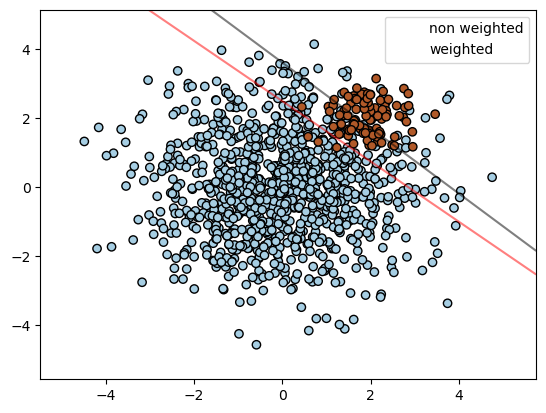

In [15]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

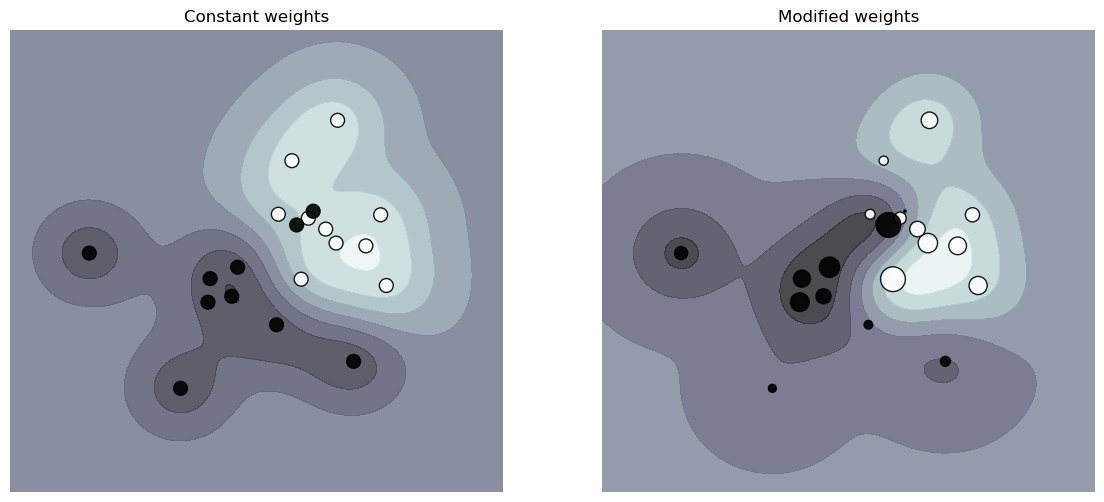

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()